In [3]:
classes = ["non-rumor","rumor",]
%matplotlib inline
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import itertools

def plot_confusion_matrix(cm,  title='Confusion Matrix'):
    #plt.figure(figsize=(6, 4), dpi=200)
    if title.startswith('FastText_gp'):
        title = title.split('_')
        title[1] = title[1]+'\n'
        title = ' '.join(title)
    else :
        title = title.split('_')
        title = ' '.join(title)
    np.set_printoptions(precision=2)
   
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    xlocations = np.array(range(len(classes)))
    plt.xticks(xlocations, classes, rotation=60)
    plt.yticks(xlocations, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual label')
    plt.xlabel('Predict label')
    
    # offset the tick
    tick_marks = np.array(range(len(classes))) + 0.5
    plt.gca().set_xticks(tick_marks, minor=True)
    plt.gca().set_yticks(tick_marks, minor=True)
    plt.gca().xaxis.set_ticks_position('none')
    plt.gca().yaxis.set_ticks_position('none')
    plt.grid(True, which='minor', linestyle='-')
    plt.gcf().subplots_adjust(bottom=0.1)
    
    # show confusion matrix
    #plt.savefig(savename, format='png')
def show_matrix(name):
    cm = np.load(name+'.npz')['matrix']

    plot_confusion_matrix(cm,name+'.png',name+' Confusion Matrix')

In [4]:
import os
import pandas as pd
import regex as re 
report_dir = "report_csv/report_final.csv"
#BERT_dir = "../Bert-Chinese-Text-Classification-Pytorch"
report_csv = pd.read_csv(report_dir)

/tmp/ipykernel_46198/3314990203.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cm = np.array(ast.literal_eval(report_csv.iloc[i]['matrix'])).astype(np.int)


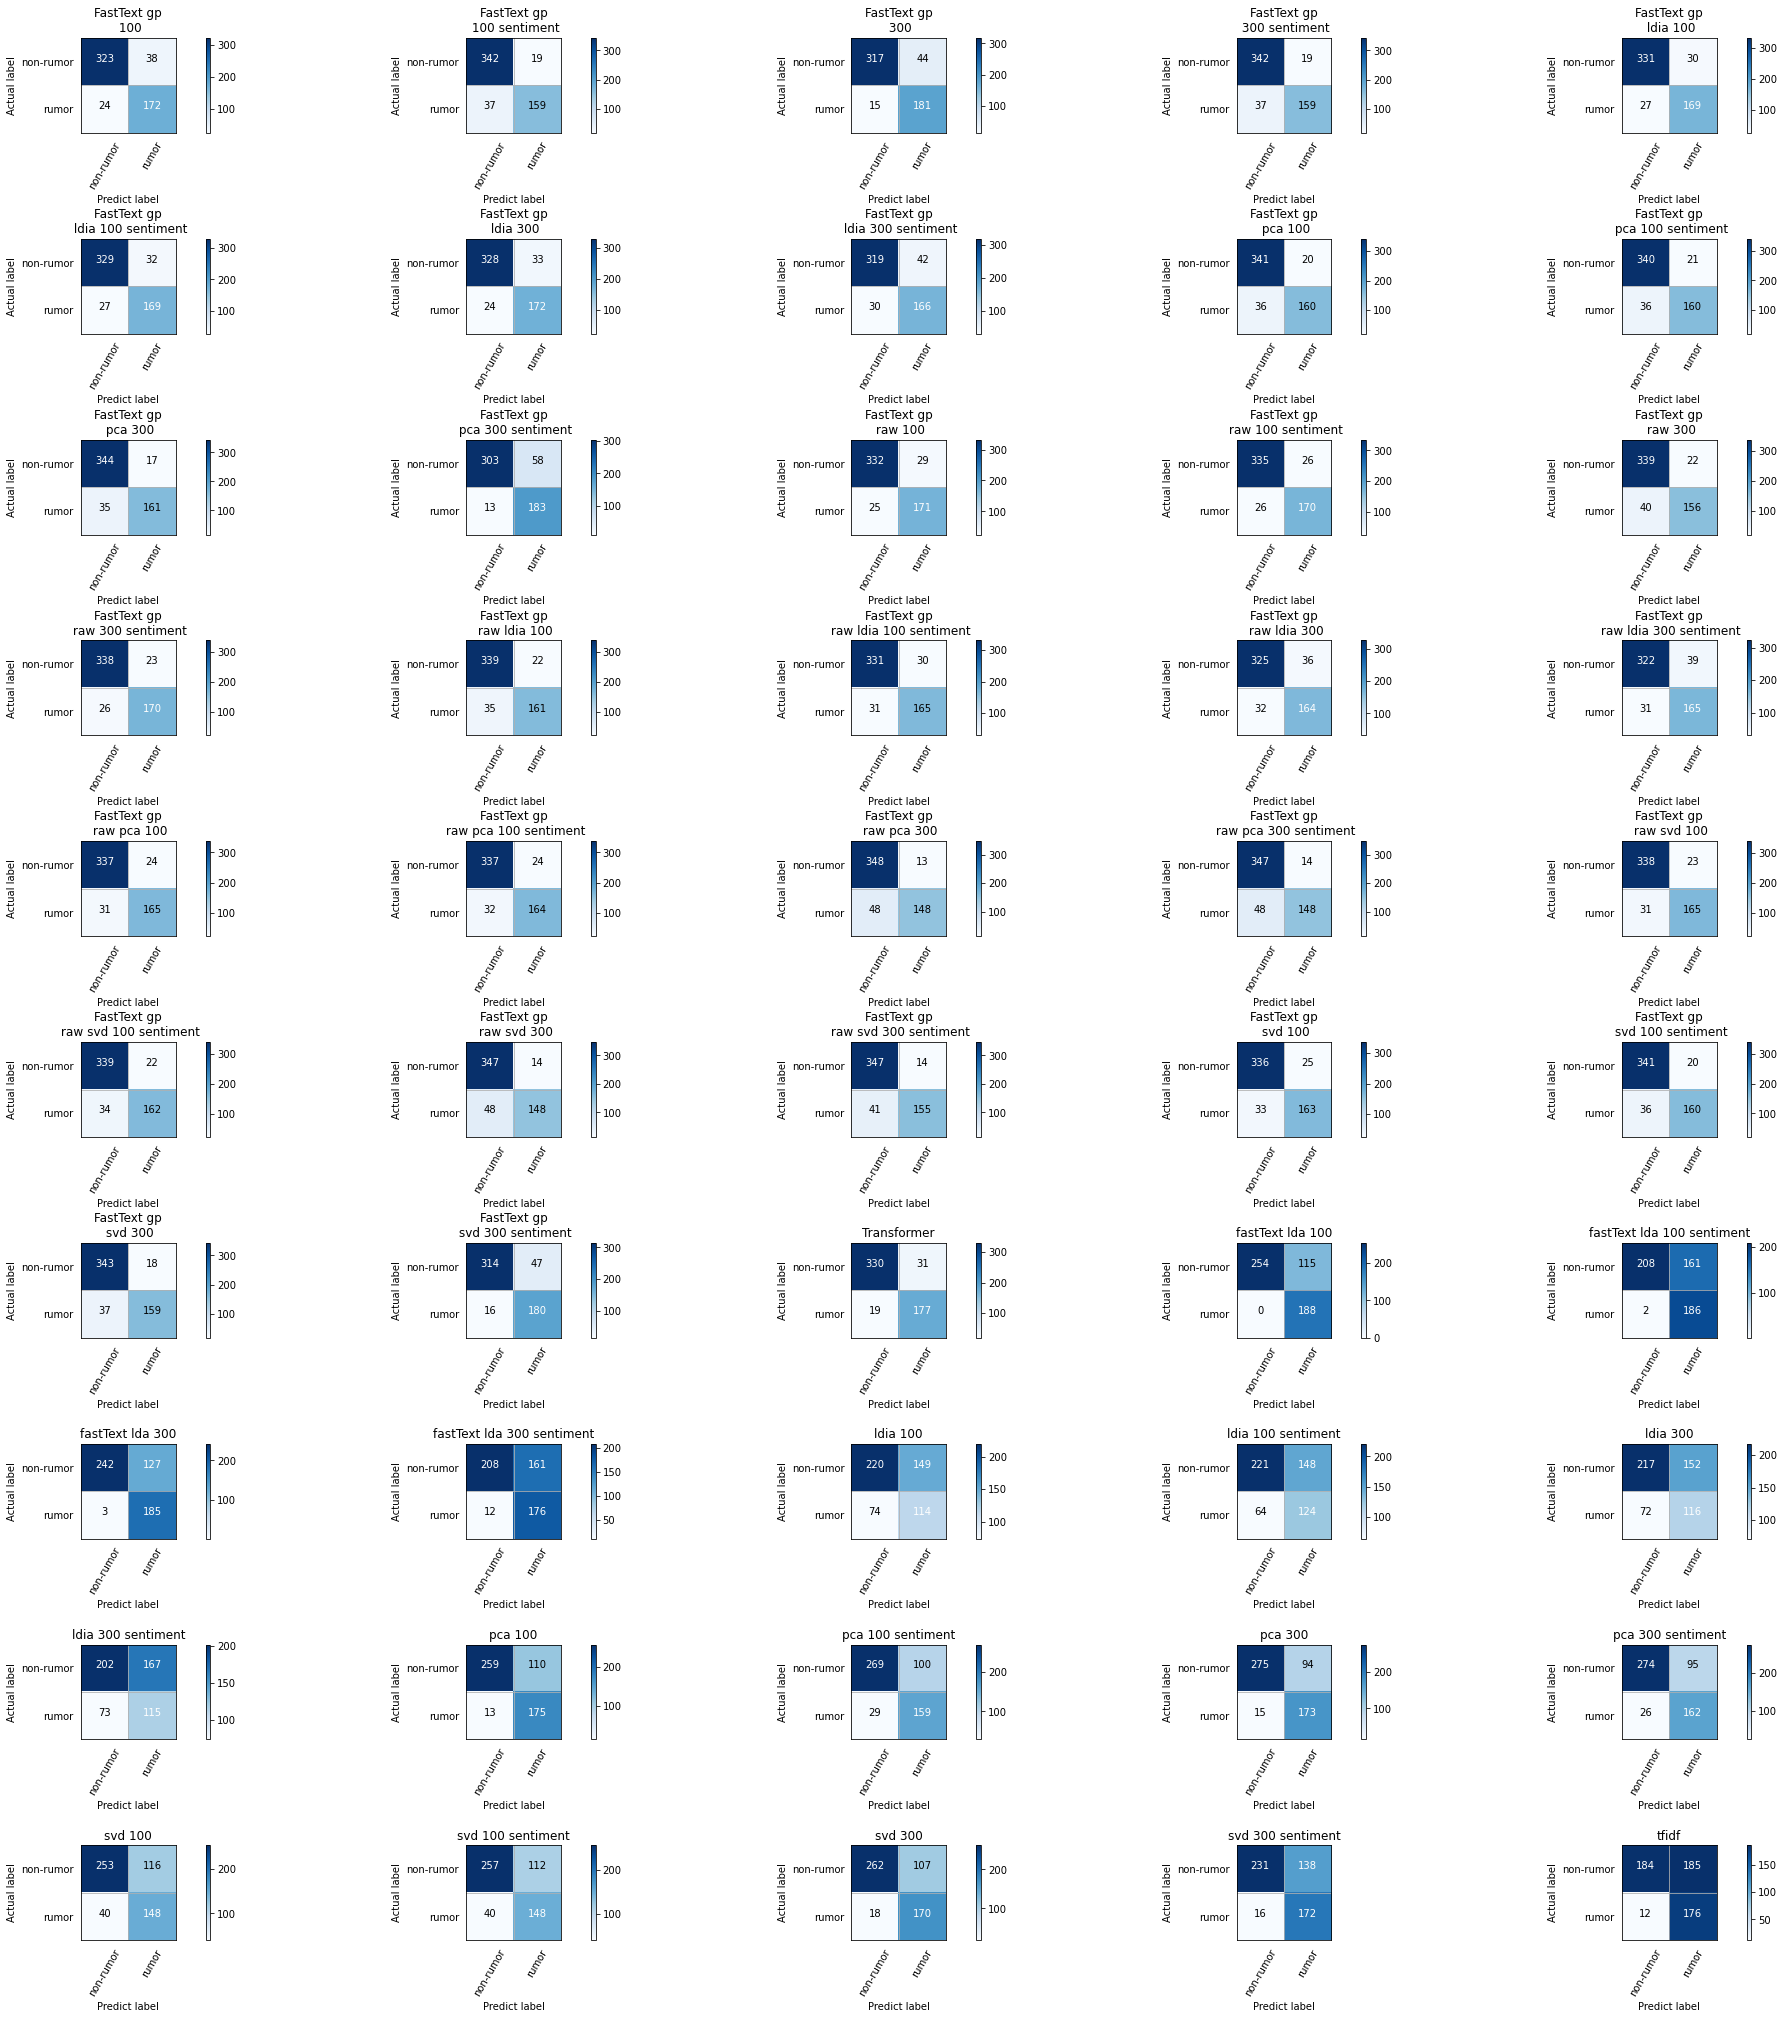

In [5]:
import ast
plt.figure(figsize=(30,30))
for i in range(len(report_csv)):
    plt.subplot(10,5,i+1)
    cm = np.array(ast.literal_eval(report_csv.iloc[i]['matrix'])).astype(np.int)
    plot_confusion_matrix(cm,report_csv.iloc[i]['model'])